(8036, 160, 320, 3)
(8036,)
0.0
Train on 5625 samples, validate on 2411 samples
Epoch 1/5
5625/5625 [==============================] - 5s 955us/step - loss: 3845375.6163 - acc: 0.0021 - val_loss: 4607.9781 - val_acc: 0.0017
Epoch 2/5
5625/5625 [==============================] - 5s 935us/step - loss: 3980.7123 - acc: 0.0030 - val_loss: 3865.3741 - val_acc: 0.0037
Epoch 3/5
5625/5625 [==============================] - 5s 921us/step - loss: 3566.4366 - acc: 0.0046 - val_loss: 7155.8634 - val_acc: 0.0000e+00
Epoch 4/5
5625/5625 [==============================] - 5s 939us/step - loss: 3068.6977 - acc: 0.0034 - val_loss: 14177.1687 - val_acc: 0.0000e+00
Epoch 5/5
5625/5625 [==============================] - 5s 921us/step - loss: 4026.4161 - acc: 0.0044 - val_loss: 4676.0828 - val_acc: 0.0025


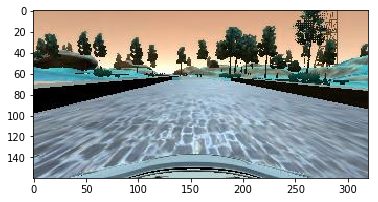

In [8]:
import csv 
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import h5py

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []

for i in range(len(lines)):
    line = lines[i]
    if line[0] == 'center':
        continue
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = 'data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

X_train = np.array(images)
y_train = np.array(measurements)

print(X_train.shape)
print(y_train.shape)
print(y_train[0])
plt.imshow(X_train[0])

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    model.fit(X_train, 
              y_train,
              batch_size=20, 
              validation_split=0.3, 
              shuffle=True, 
              epochs=5, 
              verbose=1)
    model.save('model.h5')
